# Text Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer



df = pd.read_csv("data.csv")
# Perform EDA

# Understanding the Dataset
print(df.head())
print(df.info())
print(df.shape)

# Dealing with Missing Values
print(df.isnull().sum())




                       post_id  \
0  1179055004553900032_twitter   
1  1179063826874032128_twitter   
2  1178793830532956161_twitter   
3  1179088797964763136_twitter   
4  1179085312976445440_twitter   

                                         post_tokens  \
0  i dont think im getting my baby them white 9 h...   
1  we cannot continue calling ourselves feminists...   
2                      nawt yall niggers ignoring me   
3  <user> i am bit confused coz chinese ppl can n...   
4  this bitch in whataburger eating a burger with...   

                            labels Classification Target Community  Rationales  
0             normal normal normal         normal           normal      normal  
1             normal normal normal         normal           normal      normal  
2         normal normal hatespeech         normal           normal  hatespeech  
3  hatespeech offensive hatespeech     hatespeech        offensive  hatespeech  
4  hatespeech hatespeech offensive     hatespeech    

In [7]:
nltk.download('punkt')
nltk.download('vader_lexicon')

df['post_tokens'] = df['post_tokens'].apply(word_tokenize)

def calculate_avg_token_length(tokens):
    return sum(len(token) for token in tokens) / len(tokens)

df['avg_token_length'] = df['post_tokens'].apply(calculate_avg_token_length)

sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['post_tokens'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Visualization


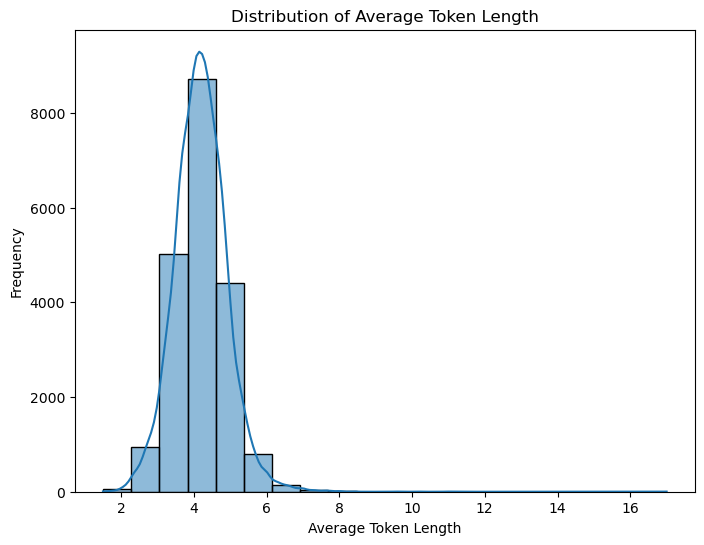

In [8]:

# Histogram of average token length
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='avg_token_length', bins=20, kde=True)
plt.title("Distribution of Average Token Length")
plt.xlabel("Average Token Length")
plt.ylabel("Frequency")
plt.show()


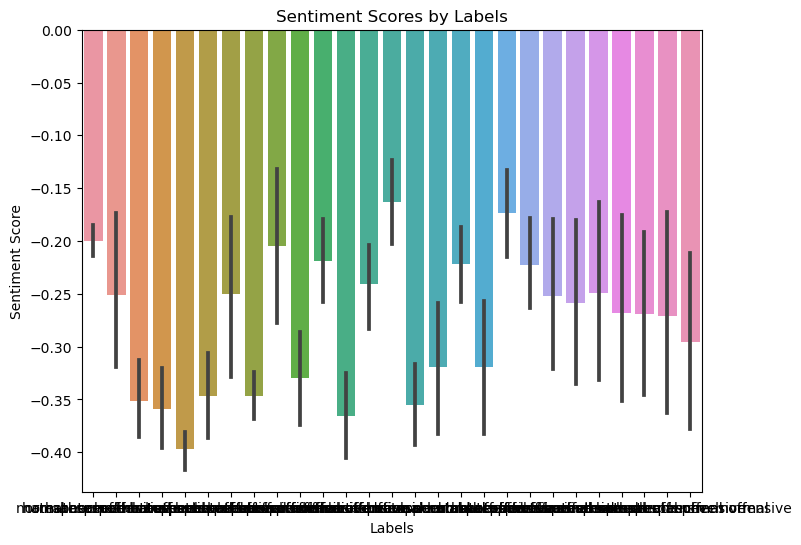

In [9]:

# Bar plot of sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='labels', y='sentiment_score')
plt.title("Sentiment Scores by Labels")
plt.xlabel("Labels")
plt.ylabel("Sentiment Score")
plt.show()




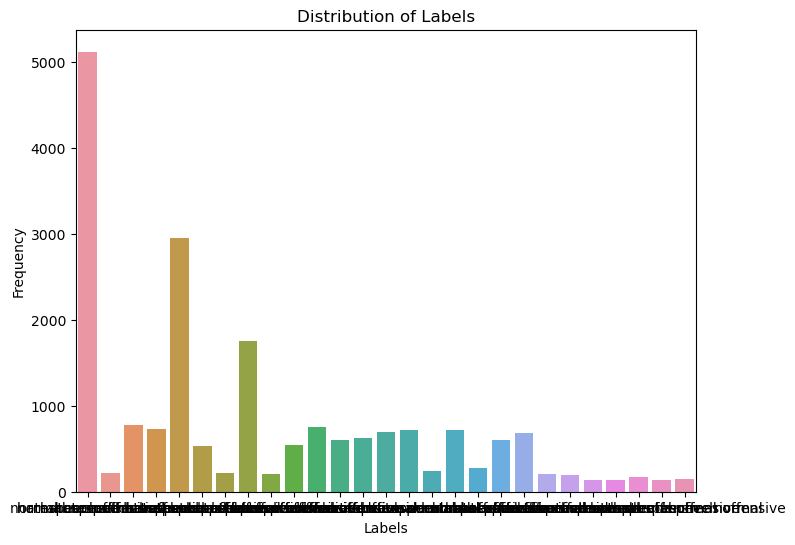

In [10]:
# Count plot of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels')
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()



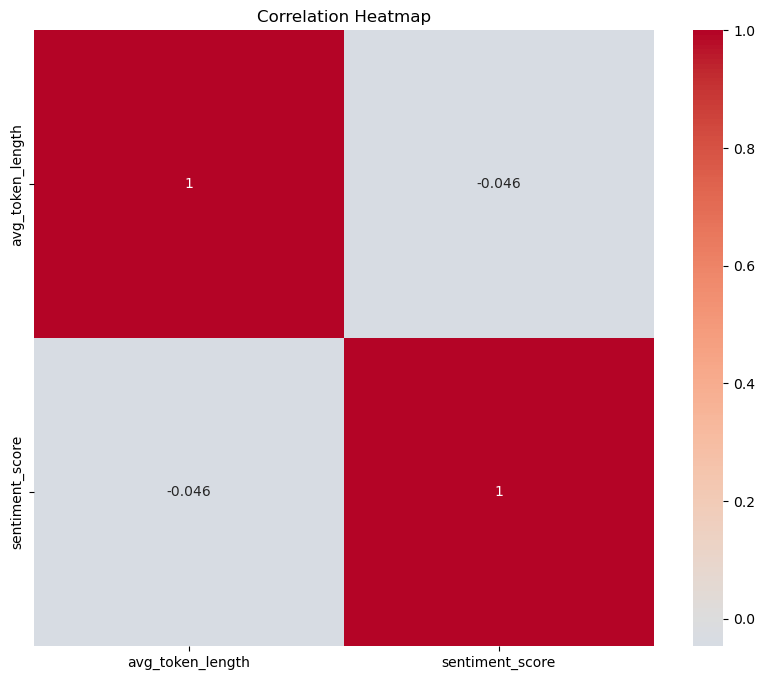

In [11]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()